In [1]:
# HIDDEN
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
import pylab as pl
import math
from scipy import stats
from scipy import misc
import pandas as pd
import statsmodels.api as sm
import numpy as np

##Binomial and Multinomial Models
In the past few sections we have spent some time on inference in the setting of the classical regression model. But in fact we have used chance models all along. An important class of models appeared, albeit informally, when we studied the randomness in the selection of jury panels, back in Chapter 3. Let us examine those a little more carefully, to exactly how the chances come in.

For ease of reference, here is one of the examples from Chapter 3.

###U.S. Supreme Court, 1965: Swain vs. Alabama

In the early 1960's, in Talladega County in Alabama, a black man called Robert Swain was convicted of raping a white woman and was sentenced to death. He appealed his sentence, citing among other factors the all-white jury. At the time, only men aged 21 or older were allowed to serve on juries in Talladega County. In the county, 26% of the eligible jurors were black, but there were only 8 black men among the 100 selected for the jury panel in Swain's trial. No black man was selected for the trial jury.

In 1965, the Supreme Court of the United States denied Swain's appeal. In its ruling, the Court wrote "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes."

Let us use the methods we have developed to examine the disparity between 8 out of 100 and 26 out of 100 black men in a panel drawn at random from among the eligible jurors.

In [2]:
AL_jury_rows = [
    ["Black",  0.26],
    ["Other", 0.74]
]
AL_jury = Table.from_rows(AL_jury_rows, ["Race", "Eligible"])
AL_jury

Race,Eligible
Black,0.26
Other,0.74


**Null:** Jury panel is like a random sample from the population of eligible jurors; that is, like the number of heads in 100 tosses of a coin that lands heads with chance 0.26.

**Alternative:** Jury panel is not like a random sample from the population of eligible jurors.

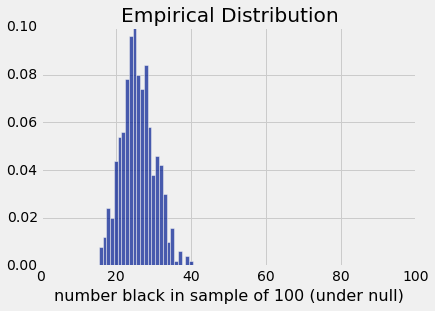

In [3]:
# Statistic: number black in sample of size 100
# Observed value of statistic: 8

# Compute the empirical distribution of the test statistic

sample_size = 100
repetitions = 500
eligible = AL_jury["Eligible"]

black_in_sample = Table([[]], ["Number black"])
for i in range(repetitions):
    sample = np.random.multinomial(sample_size, eligible)
    b = sample[0]
    black_in_sample.append([b])

black_in_sample.hist(bins = np.arange(-0.5, 100, 1), normed=True)
plots.ylim(0, 0.1)
plots.xlim(0,100)
plots.xlabel("number black in sample of 100 (under null)")
plots.title('Empirical Distribution')

As we noted in Chapter 3, the observed number of 8 black men on the jury panel is not consistent with the distribution above, computed under the null hypothesis. Therefore the data support the alternative: the panel was not selected at random.

Our goal here is to examine in detail the probability distribution of the number of black men on the panel, assuming random selection. Th empirical distribution above approximates that probability distribution. But can we say exactly what that distribution is?

We know that the probability distribution of the number of black men in a randomly selected group of 100 jurors can be found by forming all possible samples of 100 jurors, counting the number of black men in each of those samples, and looking at the histogram of that dataset. As there are a large number of possible samples, we have resorted to an empirical distribution based on some of them. However, it turns out that in this case there is a straightforward formula for the probabilities.

###Binomial distribution with parameters $n=100$ and $p=0.26$
This is the name of the probability distribution of the number of 1's in a sample of size 100 drawn at random **with** replacement from a population consisting of 26% 1's and 74% 0's. It is also a good approximation if the sample is drawn **without** replacement from a population that is very large compared to the sample, as is the case in our example involving the jury panel.

In general, the binomial distribution is the probability distribution of the number of successes in a fixed, known number of repeated success/failure trials, where the result of any group of trials does not affect chances for the others. Examples are:

- the probability distribution of the number of sixes in repeated rolls of a die
- the probability distribution of the number of heads in repeated tosses of a coin (fair or unfair)
- the probability distribution of the number of voters who will vote for a particular candidate, assuming a random sample of voters that is essentially the same as a sample drawn at random with replacement

The assumption that no group of trials influences any others is called *independence*. Two events are independent if knowing that one of them has happened does not change chances for the other. For example, knowing that the first roll of a die resulted in the face with two spots does not change the chances for any face appearing on other rolls. We say that the rolls are *independent* of each other.

The binomial distribution has two *parameters*: the number of trials $n$, and the probability $p$ of success on each single trial. A parameter is a constant associated with a distribution. Here is a histogram of the distribution for $n = 100$ and $p = 0.26$. It is the exact distribution of probabilities for the number of black jurors in a panel of 100 jurors, drawn under the null hypothesis of random selection from an eligible population in which 26% are black. Notice that the distribution is a smooth version of its empirical approximation above.

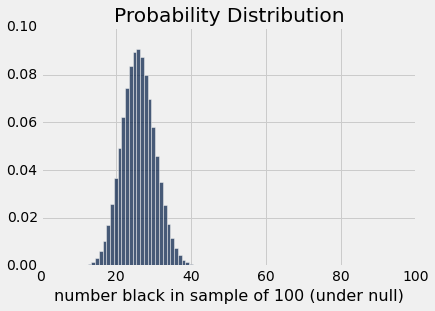

In [5]:
probs = stats.binom.pmf(range(101), 100, .26)
k = np.arange(0,101,1)
dist = Table([k, probs], ['k', 'P(k black in 100)'])
dist.hist(counts='k', bins=np.arange(-0.5, 100.6, 1))
plots.xlim(0,100)
plots.ylim(0, 0.1)
plots.xlabel('number black in sample of 100 (under null)')
plots.title('Probability Distribution')

###The c.d.f. of the binomial
We have seen the cumulative distribution function (c.d.f.) of the normal distribution evaluated at any point gives the proportion of area under the normal curve to the left of the point. So also the c.d.f. of the binomial distribution evaluated at a value gives the area of the bars of the histogram from 0 through the value. 

The function is ``stats.binom.cdf``. It takes as its arguments the value $k$, and the binomial parameters $n$ and $p$. It evaluates to the total probability of the bars $0, 1, 2, \ldots , k$.

####Example 1.
To find the $P$-value of the test using the binomial distribution, we will start by finding the chance of 8 or fewer black men in the sample:

In [6]:
# Chance of "8 or fewer black in sample"
# = all the area in the bars 8 and below

stats.binom.cdf(8, 100, 0.26)

4.7347949978893112e-06

The chance is tiny, no matter whether you use a one-tailed test of a two-tailed test. This is consistent with there being no visible probability over the 0-8 range in the probability histogram above.

We can use the binomial distribution to find $P$-values in other contexts too.

####Example 2.

In a blind taste test, 38 out of 64 people liked Drink A better than Drink B. A skeptic has an argument with the manufactuer of Drink A. Here are their positions.

**Skeptic:** That could have happened just by chance.

**Manufacturer of Drink A:** No way was that by chance.

State null and alternative hypotheses, and perform an appropriate test.

**Formal null hypothesis:** The test results are like the number of heads in 64 tosses of a fair coin.

**Formal alternative hypothesis:** The test results are not like heads in tosses of a coin.

If the null hypothesis were true, we would expect 32 "heads", that is, people who prefer Drink A. We got 38 heads. So to find the $P$-value, we will need to start with the chance of getting 38 or more heads in 64 tosses. We can calculate this using ``stats.norm.cdf`` after noting that the complement of "38 or more" is "37 or fewer".

In [7]:
# Chance of 38 or more heads in 64 tosses of a fair coin:

1 - stats.binom.cdf(37, 64, 0.5)

0.084321455719851723

If the taste test had been based on tosses of a coin, there would be over an 8.4% chance of getting 38 or more "preferences" of Drink A. If you use the 5% cutoff, you would be justified in saying the data still support the null hypothesis, whether you use a one-tailed test or a two-tailed test.

####Example 3.
Find the chance of exactly 50 heads in 100 tosses of a fair coin.

This is the chance of 0 through 50 heads minus the chance of 0 through 49 heads:

In [8]:
stats.binom.cdf(50, 100, 0.5) - stats.binom.cdf(49, 100, 0.5)

0.079589237387179379

Notice that the chance is only about 8%. The chance of 500 heads in 1000 tosses is even smaller, just about 2.5%.

In [9]:
stats.binom.cdf(500, 1000, 0.5) - stats.binom.cdf(499, 1000, 0.5)

0.025225018177683411

Notice that the chance of *exactly half* heads decreases as the number of tosses increases; indeed, it goes to zero. The law of averages says that the chance of *about half* heads increases. The word *about* is crucial; later in this section we will discuss how to quantify it.

The ``stats`` module contains a function that allows you to calculate the chance of exactly $k$ successes in a binomial model, without using ``stats.binom.cdf`` twice. The function is called ``stats.binom.pmf``, for "probability mass function". Its arguments are the same as for ``stats.binom.cdf``, but it evaluates to the probability of exactly $k$ successes.

In [10]:
# Probability mass function at k
# = chance of exactly k heads

stats.binom.pmf(50, 100, 0.5)

0.079589237387178879

How does Python calculate the binomial probabilities? Let us see if we can figure out the answer. We will do so in a simpler context.

**Example 4.** In roulette, there are 18 chances in 38 to win a bet on "red". Suppose you bet on red on 5 different spins of the wheel. What is the chance that you win exactly 3 times?

The number of bets won has the binomial distribution with parameters $n=5$ and $p=18/38$. Here is a histogram of the distribution, and the chance of exactly 3 wins.

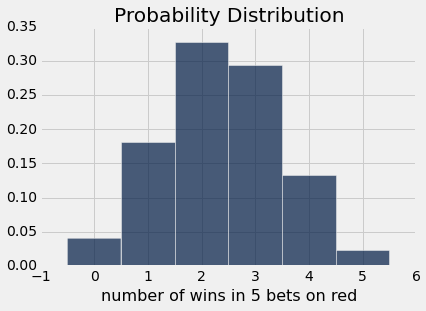

In [10]:
probs = stats.binom.pmf(range(6), 5, 18/38)
k = np.arange(0,6,1)
dist = Table([k, probs], ['k', 'P(k wins in 5 bets on red)'])
dist.hist(counts='k', bins=np.arange(-0.5, 5.6, 1))
plots.xlim(-1,6)
plots.xlabel('number of wins in 5 bets on red')
plots.title('Probability Distribution')

In [11]:
# chance of exactly 3 wins

stats.binom.pmf(3, 5, 18/38)

0.29441472251311429

According to ``stats.binom.pmf``, there is just under 30% chance that you win exactly 3 out of 5 bets on red. To see where this number comes from, let us try writing out some ways in which we could win 3 out of 5 bets. 

- WLWLW
- WWWLL
- LWWWL

and so on.

Each way is a pattern consisting of 3 W's and 2 L's. Each of these patterns has chance $(18/38)^3 (20/38)^2$. The chance of winning exactly 3 times is the total chance of all these ways:

$$
P(\mbox{3 wins among 5 bets on red}) ~=~ \mbox{number of patterns of 3 W's and 2 L's} \cdot (18/38)^3 (20/38)^2
$$

**A fact of mathematics.** The number of patterns consisting of 3 W's and 2 L's is called *5 choose 3* and is calculated as follows:

$$
\mbox{number of patterns of 3 W's and 2 L's} 
~=~ {5 \choose 3}
~=~ \frac{5!}{3!2!} ~=~ 10
$$

So

$$
P(\mbox{3 wins among 5 bets on red}) = 10 \cdot (18/38)^3(20/38)^2
$$

This is calculated in the cell below, and agrees with the answer obtained earlier by using ``stats.binom.pmf``.

In [12]:
10*((18/38)**3)*(20/38)**2

0.2944147225131143

##Binomial distribution with parameters $n$ and $p$
We can generalize our observations above to identify the probability distribution of the number of successes in $n$ repeated, independent, success/failure trials, with probability $p$ of success on each single trial. This is the binomial distribution with parameters $n$ and $p$.

$$
P(k \mbox{ successes in }n \mbox{ trials}) ~=~ {n \choose k} p^k (1-p)^{n-k}
~=~ \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k} ~~~ \mbox{for} ~ 0 \le k \le n
$$

It is worth recalling that $0!$ is defined to be 1, so that the answers make sense in the two edge cases $k=0$ and $k=n$. Notice also that when we say "$k$ successes", we mean "exactly $k$ successes".

###More than two categories: Multinomial Probabilities
The binomial can be generalized to the case where the population splits into more than two categories. This is called the *multinomial* model. That is why the NumPy method to simulate the draws is called ``np.random.multinomial``.

**Example 5.** In a population, 20% of the people are men, 30% are women, and 50% are children. Six people are drawn at random with replacement. Find the chance that the sample contains 1 man, 2 women, and 3 children.

The answer is a straightforward generalization of the binomial formula above.

$$
P(\mbox{1 man, 2 women, 3 children}) ~=~
\frac{6!}{1!2!3!} (0.2)^1 (0.3)^2 (0.5)^3
$$

###Expected Value and Standard Error of the Binomial

In an earlier section, we saw that if we had $n$ independent, repeated, success/failure trials with probability $p$ of success on each trial, then:

$$
\mbox{expected proportion of successes} ~=~ p
$$

$$
\mbox{SE of the proportion of successes} ~=~ \sqrt{ \frac{p(1-p)}{n} }
$$

Now the number of success is just $n$ times the proportion of successes. Hence

$$
\mbox{expected number of successes} ~=~ np
$$

$$
\mbox{SE of the number of successes} ~=~ \sqrt{np(1-p)}
$$

**Example 6.** What is the expected value and standard error of the number of heads in 100 tosses of a coin?

According to the formulas above, the expected number of heads is $100 \times 0.5 = 50$ and the standard error is $\sqrt{100 \times 0.5 \times 0.5} = 5$. That the expected value should be 50 is easy to guess. To visualize the standard error, it helps to see the histogram of the binomial distribution with $n=100$ and $p=0.5$.

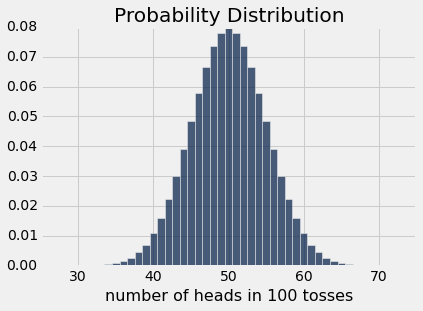

In [13]:
probs = stats.binom.pmf(np.arange(30, 71, 1), 100, 1/2)
k = np.arange(30,71,1)
dist = Table([k, probs], ['k', 'P(k heads in 100 tosses)'])
dist.hist(counts='k', bins=np.arange(29.5, 70.6, 1))
plots.xlim(25,75)
plots.xlabel('number of heads in 100 tosses')
plots.title('Probability Distribution')

Notice the beautifully symmetric, normal shape, centered at 50. The points of inflection of the curve are at 45 and 55, one standard error away from the expected value. That is consistent with the points "mean $\pm$ SD" being the points of inflecion of a normal curve.

Notice also that the number of heads is most likely to be in the 35-65 range, that is, within 3 standard errors of the expected value. Even though the possible values are 0 through 100, the probable values are in a much smaller range.

**Example 7.** What is the chance that the proportion of heads will be between 0.45 and 0.55, if you toss a coin 

(a) 100 times?

(b) 1000 times?

We can answer both of these questions by using ``stats.binom.cdf``. We do have to be consistent in our definition of "between". We will take it to mean "between 0.45 and 0.55, inclusive". That is, we will include both the endpoints in the interval.

In [14]:
#(a) 100 tosses; chance that the proportion of heads is between 0.45 and 0.55

stats.binom.cdf(55, 100, 0.5) - stats.binom.cdf(44, 100, 0.5)

0.72874697592616577

In [15]:
#(a) 1000 tosses; chance that the proportion of heads is between 0.45 and 0.55

stats.binom.cdf(550, 1000, 0.5) - stats.binom.cdf(449, 1000, 0.5)

0.99860825840557732

Notice how the chance rose from about 73% to well over 99%. That's because of the law of averages. The chance that the proportion of heads is in any fixed interval around 0.5 goes up as the number of tosses increases.

We could also have given rough approximations to these answers by using the normal approximation. In both cases, the proportion of heads is expected to be 0.5. 

- When there are 100 tosses, the standard error of the proportion is $\sqrt{0.5 \times 0.5 /100} = 0.05$.
- When there are 1000 tosses, the standard error of the proportion is $\sqrt{0.5 \times 0.5 /1000} = 0.0158$.

The corresponding normal curves give the following approximations. You can see that the approximation is better when the number of tosses is larger. Because the normal curve is continuous, we need not worry about including or excluding endpoints; each single point corresponds to an area of 0.

In [18]:
# Normal approximation to the chance of between 0.45 and 0.55 heads in 100 tosses

stats.norm.cdf(0.55, 0.5, 0.05) - stats.norm.cdf(0.45, 0.5, 0.05)

0.68268949213708607

In [19]:
# Normal approximation to the chance of between 0.45 and 0.55 heads in 1000 tosses

stats.norm.cdf(0.55, 0.5, 0.0158) - stats.norm.cdf(0.45, 0.5, 0.0158)

0.99844680743966796